# Doctor's Consultation Fees Project

### Data description

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. Here we have a dataset which contains data that records important details about a doctor. The features that is contains are:

Qualification: Qualification and degrees held by the doctor
Experience: Experience of the doctor in number of years
Rating: Rating given by patients
Profile: Type of the doctor
Miscellaneous_Info: Extra information about the doctor
Fees: Fees charged by the doctor (Target Variable)
Place: Area and the city where the doctor is located.

Our job with the dataset is to build a model that predicts the doctor’s consulting fee.

We have to datasets: one for the training and building the model, and the other for the prediction with the built model.

## Importing libraries

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets

In [560]:
# loading test data

test= pd.read_csv('Final_test.csv')
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [561]:
# loading train data

df= pd.read_csv('Final_train.csv')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


## EDA & Preprocessing

In [562]:
df.shape

(5961, 7)

Here we have 5961 rows and 7 columns to work with.

### Checking null values

In [563]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see some null values present, lets visualize it.

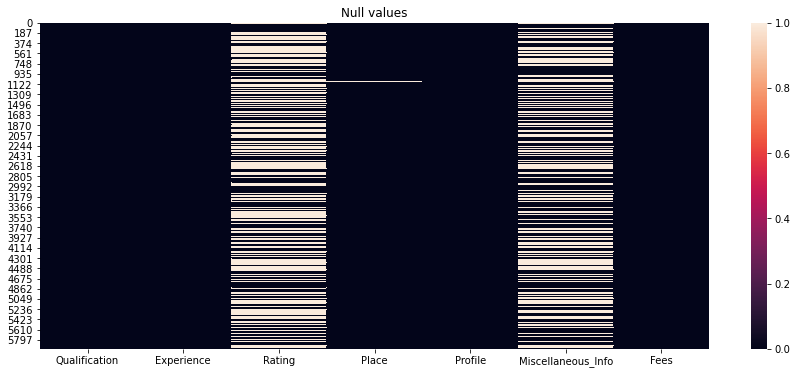

In [564]:
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

We can see 'rating' and 'Miscelleneous' having a lot of null values and 'place' having very less. lets treat them.

In [565]:
# treating the place column.

df['Place'].fillna("Unknown, Unknown", inplace = True)

In [566]:
# since there are more than half of the data that are null, lets replace it with a new category.

df['Rating'].fillna('0%', inplace=True)

The 'Miscellaneous_Info' column contains the rating,place,fee and no. of feedbacks. Most of which already has seperate columns. Lets extract the no. of feedback from the column first.

In [567]:
df[['e','f']] = df.Miscellaneous_Info.str.split('% ',1, expand=True)

In [568]:
df[['Feedback','h']] = df.f.str.split(' F',1, expand=True)

In [569]:
df['Feedback'].unique()

array(['16', '76', nan, None, '4', '14', '8', '7', '46', '6', '60', '18',
       '2', '3', '21', '42', '65', '54', '43', '24', '44', '9', '47',
       '33', '51', '23', '30', '13', '84', '15', '55', '112', '20', '1',
       '5', '17', '67', '48', '11', '12', '40', '39', '57', '68', '175',
       '28', '34', '29', '19', '10', '506', '62', '38', '116', '53', '99',
       '566', '31', '72', '49', '50', '126', '22', '92', '59', '78',
       '493', '147', '101', '444', '1061', '282', '213', '82', '181',
       '187', '36', '71', '131', '159', '32', '141', '91', '153', '150',
       '88', '83', '26', '80', '27', '45', '35', '560', '188', '94', '64',
       'OFF* Available Today', '41', '37', '246', '109', '135', '52',
       'OFF* Available on', '118', '547', '203', '372', '435', '108',
       'OFF*', '56', '66', '102', '63', '210', '180', '61', '120', '128',
       '98', '854', '105', '96', '89', '25', '86', '74', '130', '148',
       '332', '97', 'Pitampura, Delhi', '185', '154', '343', '1

We can see there are some unwanted strings, lets remove them.

In [570]:
df['Feedback']= df['Feedback'].replace("OFF* Available Today", 0).replace("OFF* Available on", 0).replace("OFF*", 0).replace("Pitampura, Delhi", 0).replace("Nungambakkam, Chennai ₹500", 0).replace(", Mumbai ₹200", 0).replace("Khar West, Mumbai ₹2,000", 0)

In [571]:
# dropping the unwanted columns

df.drop(['Miscellaneous_Info','e','f','h'], axis=1, inplace= True)

In [572]:
# Now lets treat the null values

df['Feedback'].fillna(0, inplace=True)

As more than half of the records are empty, we fill the null with a different category.

In [573]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
Feedback         0
dtype: int64

The null values have been removed.

In [574]:
df

,Qualification,Experience,Rating,Place,Profile,Fees,Feedback
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,16
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,76
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,300,0
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,250,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,4
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300,45
5957,MBBS,33 years experience,0%,"Nungambakkam, Chennai",General Medicine,100,0
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600,11
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100,0


In [575]:
df.nunique()

Qualification    1420
Experience         64
Rating             52
Place             878
Profile             6
Fees               40
Feedback          205
dtype: int64

#### Qualification column.

In [576]:
df['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

Most of the qualifications belongs to only few category, but the profile specification is added to it, for wich the category is huge. lets split the data reduce the category.

In [577]:
df[['Qualifications','b']] = df.Qualification.str.split('-',1, expand=True)

In [578]:
# dropping unwanted columns

df.drop(['Qualification','b'], axis=1, inplace= True)

#### Experience column

In [579]:
df.dtypes

Experience        object
Rating            object
Place             object
Profile           object
Fees               int64
Feedback          object
Qualifications    object
dtype: object

Experience column is of object datatype, presence of certain characters is making it object. lets remove them.

In [580]:
df["Experience"]= df["Experience"].str.replace(" years experience", "").astype(int)

In [581]:
df.dtypes

Experience         int32
Rating            object
Place             object
Profile           object
Fees               int64
Feedback          object
Qualifications    object
dtype: object

Converted to integer.

#### Rating column

The column Rating contains numeric data, but due to presence of a character, its showing object datatype. lets convert it to integer.

In [582]:
df["Rating"]= df["Rating"].str.replace("%", "").astype(int)

In [583]:
df.dtypes

Experience         int32
Rating             int32
Place             object
Profile           object
Fees               int64
Feedback          object
Qualifications    object
dtype: object

Converted to integer.

#### Place column

In the dataset the 'place' columns contains two values in all its records, lets split them.

In [584]:
df[['Location','City']] = df.Place.str.split(', ',1, expand=True)

In [585]:
# now we drop the place column.

df.drop(['Place'], axis=1, inplace= True)

In [586]:
df.isnull().sum()

Experience        0
Rating            0
Profile           0
Fees              0
Feedback          0
Qualifications    0
Location          0
City              1
dtype: int64

Here we found a null value in the city column. lets treat it.

In [587]:
df[df['City'].isnull()]

,Experience,Rating,Profile,Fees,Feedback,Qualifications,Location,City
3980,23,0,Dentist,250,0,BDS,e,None


We can see the null value contains location value as 'e', lets treat that too.

In [588]:
df['City'].fillna("Unknown", inplace = True)

In [589]:
df['Location']= df['Location'].replace("e", "Unknown")

In [590]:
df['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Sector 5, Delhi          1
Name: City, dtype: int64

Here we have only one record of category sector 5 delhi, lets replace it with the basic city.

In [591]:
df[(df['City'] == "Sector 5, Delhi")]

,Experience,Rating,Profile,Fees,Feedback,Qualifications,Location,City
2169,11,0,Dentist,250,0,BDS,Dwarka,"Sector 5, Delhi"


As dwarka falls in delhi, lets replace the city with delhi.

In [592]:
df['City']= df['City'].replace("Sector 5, Delhi", "Delhi")

In [593]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Unknown'],
      dtype=object)

#### Feedback column

In [594]:
df.dtypes

Experience         int32
Rating             int32
Profile           object
Fees               int64
Feedback          object
Qualifications    object
Location          object
City              object
dtype: object

The feedback column contains numeric data, but is in object datatype. lets convert it to integer.

In [595]:
df["Feedback"]= df["Feedback"].astype(str).astype(int)

In [596]:
df.dtypes

Experience         int32
Rating             int32
Profile           object
Fees               int64
Feedback           int32
Qualifications    object
Location          object
City              object
dtype: object

converted

In [597]:
df

,Experience,Rating,Profile,Fees,Feedback,Qualifications,Location,City
0,24,100,Homeopath,100,16,"BHMS, MD",Kakkanad,Ernakulam
1,12,98,Ayurveda,350,76,"BAMS, MD",Whitefield,Bangalore
2,9,0,ENT Specialist,300,0,"MBBS, MS",Mathikere - BEL,Bangalore
3,12,0,Ayurveda,250,0,BSc,Bannerghatta Road,Bangalore
4,20,100,Ayurveda,250,4,BAMS,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,45,"MBBS, MS",Basavanagudi,Bangalore
5957,33,0,General Medicine,100,0,MBBS,Nungambakkam,Chennai
5958,41,97,General Medicine,600,11,MBBS,Greater Kailash Part 2,Delhi
5959,15,90,General Medicine,100,0,"MBBS, MD",Vileparle West,Mumbai


In [598]:
df.describe()

,Experience,Rating,Fees,Feedback
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640,10.339540
std,11.142798,47.340934,190.920373,49.607924
min,0.000000,0.000000,5.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000
75%,23.000000,96.000000,500.000000,1.000000
max,66.000000,100.000000,950.000000,1782.000000


Here we can check the numeric data columns, all the columns have the same count. Also the difference between the mean and median is less in some columns and high in some, so the data can have skewness. Also there is no huge difference between the mean and the maximum,except for Feedback, hence the the dataset is less prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

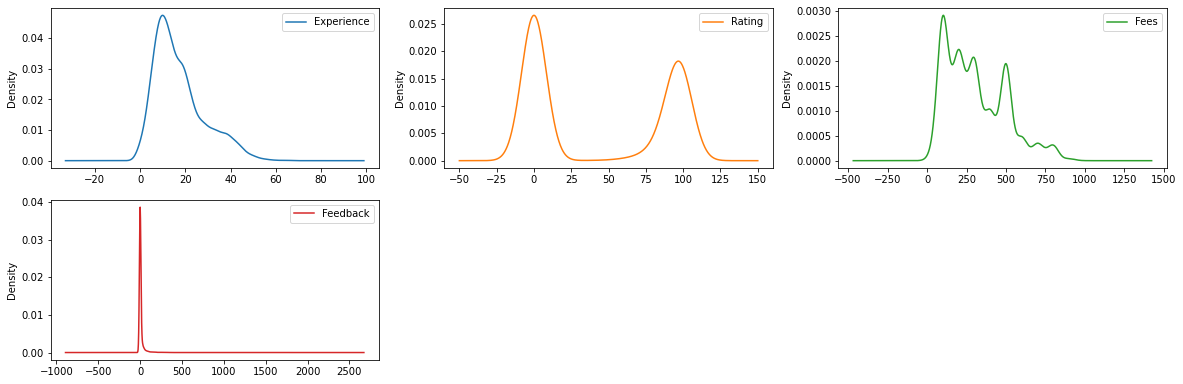

In [599]:
df.plot(kind='density', subplots= True, layout=(3,3),sharex=False, legend=True, figsize=[20,10])
plt.show

We can check the distribution of the numeric columns. lets check closely.

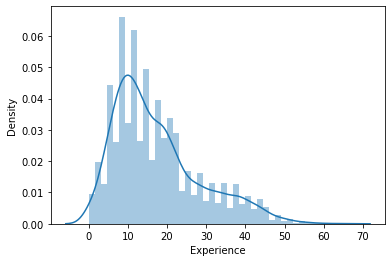

In [600]:
sns.distplot(df['Experience']);

Here the data can be seen having same variance present, also some skewness can be seen at the end.

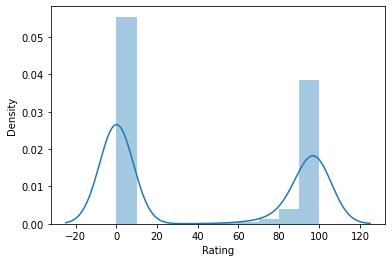

In [601]:
sns.distplot(df['Rating']);

Here the data is categorical in nature, hence variance can be seen.

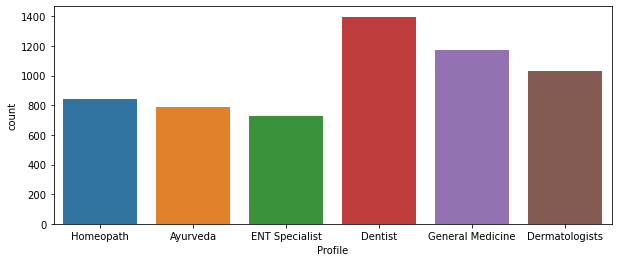

In [602]:
plt.figure(figsize=[10,4])
sns.countplot(df['Profile'])
plt.show()

Here we can see most of the doctors being 'dentist' followed by 'General doctor'

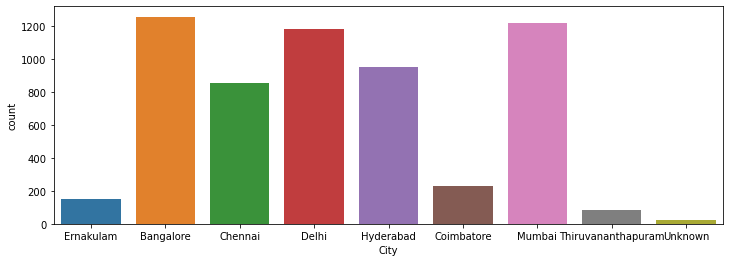

In [603]:
plt.figure(figsize=[12,4])
sns.countplot(df['City'])
plt.show()

We can see most of the doctors are from bangalore followed by mumbai and delhi.

### Encoding

In [604]:
df.dtypes

Experience         int32
Rating             int32
Profile           object
Fees               int64
Feedback           int32
Qualifications    object
Location          object
City              object
dtype: object

In [605]:
# The columns Profile and city has few categories, lets encode them get_dummies.

df= pd.get_dummies(df, columns= ['City','Profile'], prefix=['City','Profile'])

In [606]:
# encoding the rest

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [607]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))


In [608]:
df['Experience']= enc.fit_transform(df['Experience'].values.reshape(-1,1))
df['Rating']= enc.fit_transform(df['Rating'].values.reshape(-1,1))
df['Feedback']= enc.fit_transform(df['Feedback'].values.reshape(-1,1))

In [609]:
df.dtypes

Experience                  float64
Rating                      float64
Fees                          int64
Feedback                    float64
Qualifications              float64
Location                    float64
City_Bangalore                uint8
City_Chennai                  uint8
City_Coimbatore               uint8
City_Delhi                    uint8
City_Ernakulam                uint8
City_Hyderabad                uint8
City_Mumbai                   uint8
City_Thiruvananthapuram       uint8
City_Unknown                  uint8
Profile_Ayurveda              uint8
Profile_Dentist               uint8
Profile_Dermatologists        uint8
Profile_ENT Specialist        uint8
Profile_General Medicine      uint8
Profile_Homeopath             uint8
dtype: object

Dataset has been encoded.

### Checking correlation

In [610]:
cor= df.corr()
cor

,Experience,Rating,Fees,Feedback,Qualifications,Location,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
Experience,1.000000,-0.058331,0.001464,0.022934,0.169892,0.002774,-0.058457,0.025898,-0.008766,0.059662,...,-0.055023,0.053803,-0.014847,-0.087315,-0.042760,-0.202178,-0.095395,0.082496,0.336128,-0.070065
Rating,-0.058331,1.000000,0.140718,0.362907,0.013313,-0.041962,0.139099,-0.047918,-0.061813,0.016764,...,-0.016605,-0.030226,-0.061934,-0.058041,-0.154056,0.245620,0.139856,-0.055288,-0.131336,-0.099178
Fees,0.001464,0.140718,1.000000,0.115561,0.282347,-0.062547,0.056616,-0.052178,-0.160503,0.143421,...,-0.000997,0.000925,-0.089157,-0.069429,-0.140812,-0.202126,0.204426,0.155084,0.015463,-0.003072
Feedback,0.022934,0.362907,0.115561,1.000000,0.124570,-0.026963,0.082563,-0.033777,-0.004848,0.032610,...,-0.023467,-0.043491,-0.024356,-0.021229,-0.059863,-0.092448,0.196168,0.023879,-0.025209,-0.036332
Qualifications,0.169892,0.013313,0.282347,0.124570,1.000000,0.007400,-0.012940,0.066465,-0.071005,0.037281,...,0.046658,-0.063571,-0.050326,0.004974,-0.494805,-0.379906,0.350798,0.348301,0.350998,-0.166680
Location,0.002774,-0.041962,-0.062547,-0.026963,0.007400,1.000000,-0.054109,0.078554,0.106201,0.105342,...,-0.051841,-0.159350,0.066314,0.098280,-0.031593,0.019755,-0.020182,-0.005227,0.045529,-0.018442
City_Bangalore,-0.058457,0.139099,0.056616,0.082563,-0.012940,-0.054109,1.000000,-0.211639,-0.103141,-0.257620,...,-0.225333,-0.262225,-0.062575,-0.034232,0.063338,-0.056118,0.000854,0.029336,-0.025385,0.007191
City_Chennai,0.025898,-0.047918,-0.052178,-0.033777,0.066465,0.078554,-0.211639,1.000000,-0.081605,-0.203831,...,-0.178285,-0.207474,-0.049509,-0.027084,-0.077431,0.034602,-0.019350,0.043239,0.059896,-0.054821
City_Coimbatore,-0.008766,-0.061813,-0.160503,-0.004848,-0.071005,0.106201,-0.103141,-0.081605,1.000000,-0.099335,...,-0.086886,-0.101111,-0.024128,-0.013199,-0.077720,0.187007,-0.059018,-0.047669,0.024496,-0.070895
City_Delhi,0.059662,0.016764,0.143421,0.032610,0.037281,0.105342,-0.257620,-0.203831,-0.099335,1.000000,...,-0.217019,-0.252550,-0.060266,-0.032969,-0.031371,-0.054293,0.022701,0.031169,-0.019225,0.064440


Here we can see the correlation between all the columns, lets visualize it.

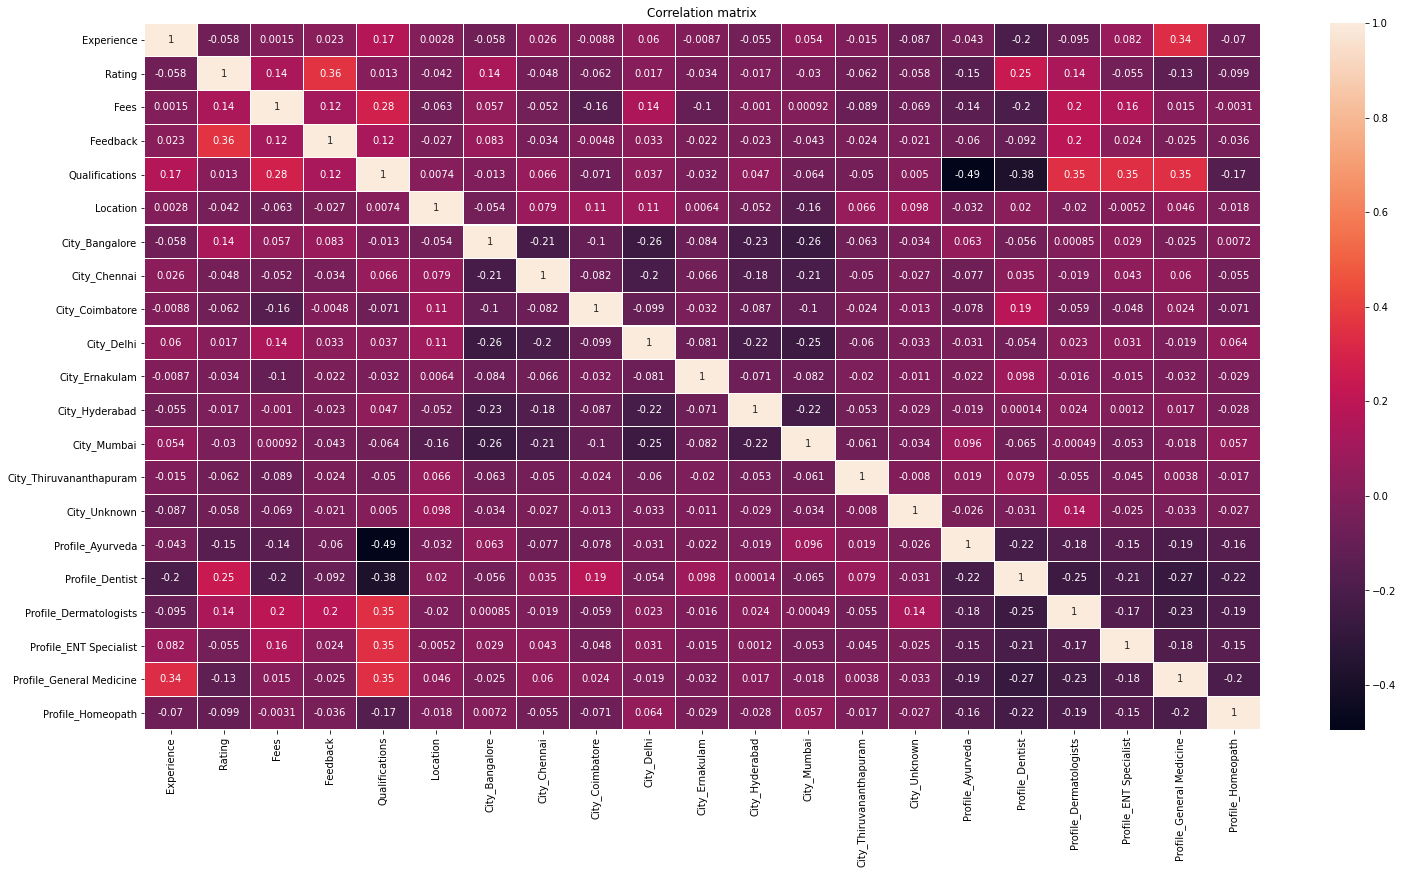

In [611]:
plt.figure(figsize=[25,13])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see most of the correlations being negative, but there are some positive relations as well. Among the independent columns, Feedback and rating show the best relation, with Qualification showing the most negative relation with profile of ayurveda and dentist.

In [612]:
# checking correlation of target with independent columns.

cor['Fees'].sort_values(ascending=False)

Fees                        1.000000
Qualifications              0.282347
Profile_Dermatologists      0.204426
Profile_ENT Specialist      0.155084
City_Delhi                  0.143421
Rating                      0.140718
Feedback                    0.115561
City_Bangalore              0.056616
Profile_General Medicine    0.015463
Experience                  0.001464
City_Mumbai                 0.000925
City_Hyderabad             -0.000997
Profile_Homeopath          -0.003072
City_Chennai               -0.052178
Location                   -0.062547
City_Unknown               -0.069429
City_Thiruvananthapuram    -0.089157
City_Ernakulam             -0.101609
Profile_Ayurveda           -0.140812
City_Coimbatore            -0.160503
Profile_Dentist            -0.202126
Name: Fees, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

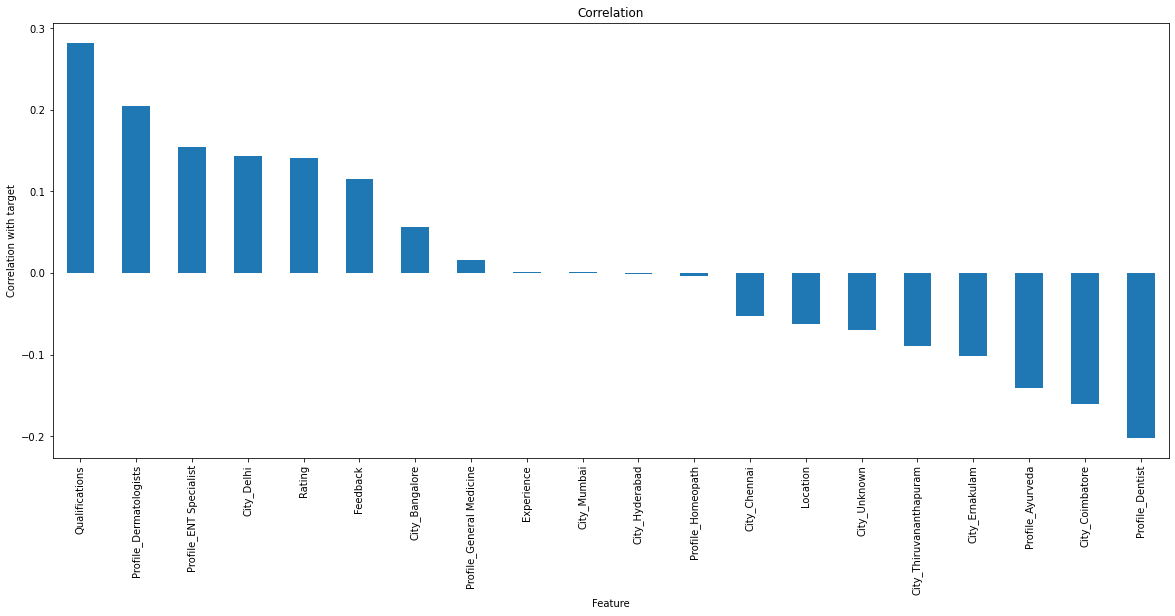

In [613]:
plt.figure(figsize=(20,8))
cor['Fees'].sort_values(ascending=False).drop(['Fees']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

Here, qualification is showing the highest correlation with the target, followed by some profile and rating. profile of dentist is showing the most negative correlation. Lets inspect closely.

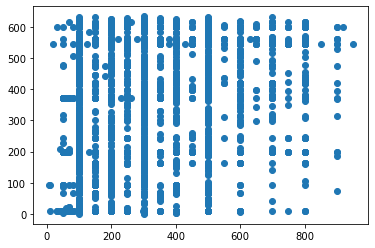

In [614]:
plt.scatter(df['Fees'],df['Qualifications'])
plt.show()

Here we have a positive correlation, we can see as the graph advancing, the data poins are getting reduced from the bottom. 

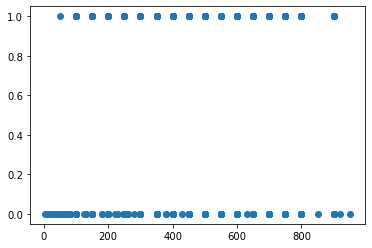

In [615]:
plt.scatter(df['Fees'],df['Profile_Dermatologists'])
plt.show()

We can see little positive relation.

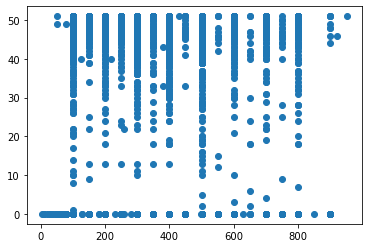

In [616]:
plt.scatter(df['Fees'],df['Rating'])
plt.show()

Here we have less correlation between the columns.

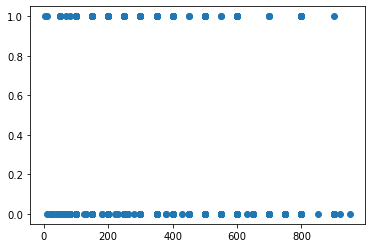

In [617]:
plt.scatter(df['Fees'],df['Profile_Dentist'])
plt.show()

Here we can see a negative correlation, with data points going down as graph progresses.

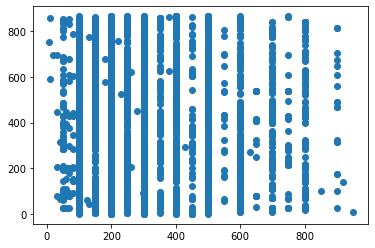

In [618]:
plt.scatter(df['Fees'],df['Location'])
plt.show()

Here too we can see very little correlation, mostly negative.

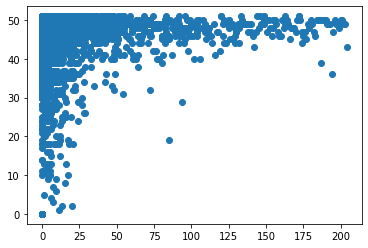

In [619]:
plt.scatter(df['Feedback'],df['Rating'])
plt.show()

We can see here a positive correlation among the independent columns.

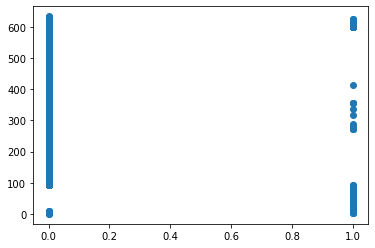

In [620]:
plt.scatter(df['Profile_Ayurveda'],df['Qualifications'])
plt.show()

A negative correlation can be seen here among the independent columns.

### Checking Outliers

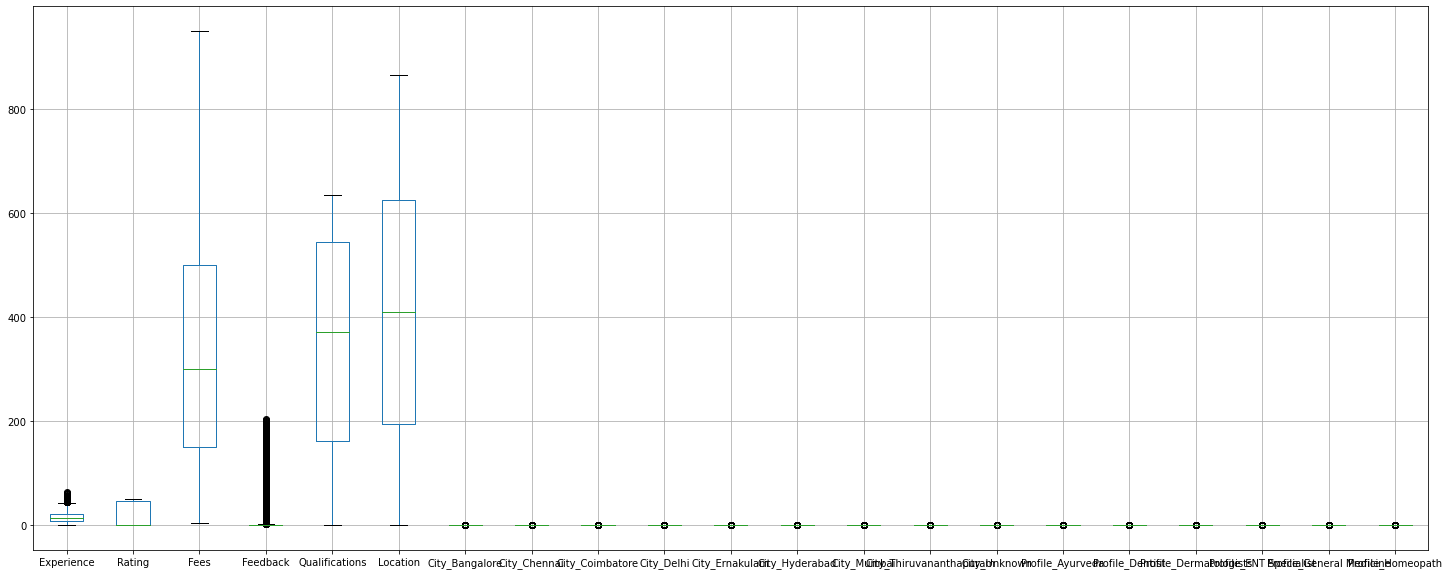

In [621]:
df.boxplot(figsize=(25,10))
plt.show()

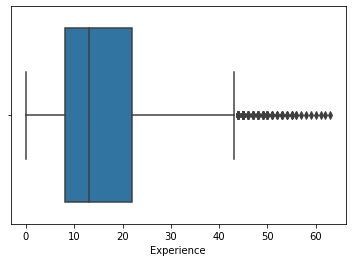

In [622]:
sns.boxplot(df['Experience'])

Here we can see some outliers present but are very close to the threshold.

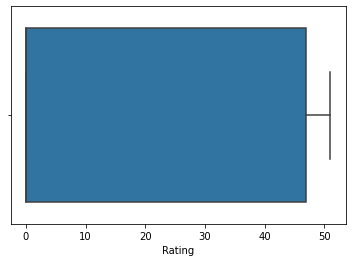

In [623]:
sns.boxplot(df['Rating'])

No outliers present.

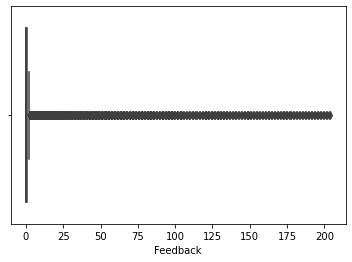

In [624]:
sns.boxplot(df['Feedback'])

Here the majority of data consists of only one record. as more than half of the data were null.

Analysing the dataset we can say that there are very few outliers present and those present are very close to the threshold, hence we need not remove the outliers as it will also lead to dataloss.

### Checking skewness

In [625]:
df.skew()

Experience                   0.998674
Rating                       0.312686
Fees                         0.751870
Feedback                     4.617332
Qualifications              -0.117821
Location                     0.109032
City_Bangalore               1.416677
City_Chennai                 2.035059
City_Coimbatore              4.816241
City_Delhi                   1.509849
City_Ernakulam               6.000437
City_Hyderabad               1.860027
City_Mumbai                  1.465681
City_Thiruvananthapuram      8.146287
City_Unknown                15.046180
Profile_Ayurveda             2.176749
Profile_Dentist              1.254545
Profile_Dermatologists       1.725211
Profile_ENT Specialist       2.308676
Profile_General Medicine     1.525779
Profile_Homeopath            2.058645
dtype: float64

We can see some skewness present in the non-categorical columns, taking the threshold of(<0.5 and >-0.5). lets treat them.

In [626]:
# Treating skewness for non-categorical columns.

colms=['Experience','Feedback']
from sklearn.preprocessing import power_transform

for i in df[colms]:
    if df[i].skew()>0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))
        
    if df[i].skew()<-0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))
df.skew()

Experience                  -0.015662
Rating                       0.312686
Fees                         0.751870
Feedback                     1.188038
Qualifications              -0.117821
Location                     0.109032
City_Bangalore               1.416677
City_Chennai                 2.035059
City_Coimbatore              4.816241
City_Delhi                   1.509849
City_Ernakulam               6.000437
City_Hyderabad               1.860027
City_Mumbai                  1.465681
City_Thiruvananthapuram      8.146287
City_Unknown                15.046180
Profile_Ayurveda             2.176749
Profile_Dentist              1.254545
Profile_Dermatologists       1.725211
Profile_ENT Specialist       2.308676
Profile_General Medicine     1.525779
Profile_Homeopath            2.058645
dtype: float64

The skwness is removed and minimized. lets proceed.

## Scaling

In [627]:
# Lets split the data first into x and y first.

x= df.drop(['Fees'], axis=1)
y= df['Fees']

In [628]:
from sklearn.preprocessing import StandardScaler


scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Experience,Rating,Feedback,Qualifications,Location,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.745287,1.316235,1.811741,-0.446806,-0.455031,-0.517193,-0.409207,-0.199424,-0.498112,6.161232,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,-0.494962,2.463975
1,-0.313543,1.230229,1.881217,-1.308363,1.730781,1.933513,-0.409207,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
2,-0.685576,-0.876920,-0.575489,1.101077,0.153874,1.933513,-0.409207,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
3,-0.313543,-0.876920,-0.575489,-0.286176,-1.344969,1.933513,-0.409207,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
4,0.442473,1.316235,1.535172,-1.580946,-0.302805,-0.517193,2.443753,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.360570,1.230229,1.869601,1.101077,-1.337162,1.933513,-0.409207,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
5957,1.320779,-0.876920,-0.575489,0.176241,0.477842,-0.517193,2.443753,-0.199424,-0.498112,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,2.020357,-0.405848
5958,1.749842,1.187226,1.768745,0.176241,-0.771193,-0.517193,-0.409207,-0.199424,2.007581,-0.162305,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,2.020357,-0.405848
5959,0.000822,0.886205,-0.575489,1.023196,1.672232,-0.517193,-0.409207,-0.199424,-0.498112,-0.162305,-0.435684,1.972327,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,2.020357,-0.405848


Our data is scaled. now lets proceed.

## Finding best random state

In [629]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.2,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.21528145231658602 on random state 44


We found the best score for random state 44

### Creating training and validation split.

In [630]:
# Creating split for training and validation using the best random state.

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.2,random_state=44)

## Model creation

In [631]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.16814762018790597
r2 score:  0.21528145231658602
Mean absolute error: 133.64144362106697
Mean squared error: 29576.39999775219
Root mean squared error: 171.9779055511265


In [632]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  0.9985482323211805
r2 score:  -0.3921789154256077
Mean absolute error: 159.6839899413244
Mean squared error: 52471.858340318526
Root mean squared error: 229.06736638010776


In [633]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.8838640641894612
r2 score:  0.23888637773042254
Mean absolute error: 127.71748822496309
Mean squared error: 28686.719591933113
Root mean squared error: 169.37154304053888


In [634]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.09793295904616217
r2 score:  0.11760513960262875
Mean absolute error: 138.8190754563456
Mean squared error: 33257.8647772734
Root mean squared error: 182.36738956642824


In [635]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))
print('Mean absolute error:', mean_absolute_error(y_test,predls))
print('Mean squared error:', mean_squared_error(y_test,predls))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predls)))

Score:  0.1681081071331797
r2 score:  0.2121823533757684
Mean absolute error: 134.1689448429028
Mean squared error: 29693.206450431077
Root mean squared error: 172.31716818248574


In [636]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train,y_train)
predx= xg.predict(x_test)
print('Score: ',xg.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predx))
print('Mean absolute error:', mean_absolute_error(y_test,predx))
print('Mean squared error:', mean_squared_error(y_test,predx))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predx)))

Score:  0.7336225283373852
r2 score:  0.22859427376978703
Mean absolute error: 129.19099568841042
Mean squared error: 29074.63368477167
Root mean squared error: 170.51285489596282


Here random forest reg and xgboost are giving us a better score and less errors. lets check cv score for over and under fitting.

## Checking cross validation score

In [637]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.1715985246060183


In [638]:
scr= cross_val_score(dt,x,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -0.4936705689094912


In [639]:
scr= cross_val_score(fr,x,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.1823480488006991


In [640]:
scr= cross_val_score(svr,x,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.10189417662052605


In [641]:
scr= cross_val_score(ls,x,y,cv=5)
print('cross validation score for lasso reg model: ', scr.mean())

cross validation score for lasso reg model:  0.17173671632815857


In [642]:
scr= cross_val_score(xg,x,y,cv=5)
print('cross validation score for xgboost model: ', scr.mean())

cross validation score for xgboost model:  0.19213452486931656


We can see random forest and xgboost are giving us the best score. Also the difference between the cv score and r2 score is lesser in both the models. lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [643]:
from sklearn.model_selection import RandomizedSearchCV

par= {'n_estimators': [100],'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par,cv=5) 
rcvfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100]})

In [644]:
rcvfr.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'mae'}

In [645]:
# Now using the above parameter which is found to be best, we create our model.

finalmodel1= RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', criterion= 'mae')
finalmodel1.fit(x_train,y_train)
predf1=finalmodel1.predict(x_test)
print('Score: ',finalmodel1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf1))
print('Mean absolute error:', mean_absolute_error(y_test,predf1))
print('Mean squared error:', mean_squared_error(y_test,predf1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf1)))

Score:  0.7312507194252627
r2 score:  0.2509283487941687
Mean absolute error: 125.90943000838224
Mean squared error: 28232.852209807203
Root mean squared error: 168.02634379705822


With the random forest model we are getting a train score of 73% and an r2 score of 25%. with the errors being less.

In [495]:
par1= {'max_depth': np.arange(1,10)}

gcvxg= GridSearchCV(xg,par1,cv=5) 
gcvxg.fit(x_train,y_train)
gcvxg.best_params_

{'max_depth': 4}

In [503]:
# Now using the above parameter which is found to be best, we create our model.

finalmodel2= XGBRegressor(max_depth=4)
finalmodel2.fit(x_train,y_train)
predf2=finalmodel2.predict(x_test)
print('Score: ',finalmodel2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf2))
print('Mean absolute error:', mean_absolute_error(y_test,predf2))
print('Mean squared error:', mean_squared_error(y_test,predf2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf2)))

Score:  0.49281517755052373
r2 score:  0.2583688140257343
Mean absolute error: 126.31884408776538
Mean squared error: 27952.41768139214
Root mean squared error: 167.18976548040297


Here xgboost is giving us a training score of 49% and r2 score of 26%.

By trying many approach for pre processing, feature engineering with hit and trial we could manage a final r2 score of 26%.

 By analysing the models, we can say that random forest model is performing better, as its training score is more. so we make it our final model.

## Saving the model

In [649]:
import joblib

joblib.dump(finalmodel1,'doc_consultation.pkl')

['doc_consultation.pkl']

## Pre Processing the test data. 

In [653]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [654]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Null values present, lets treat it.

In [655]:
test['Place'].fillna("Unknown, Unknown", inplace = True)

In [656]:
test['Rating'].fillna('0%', inplace=True)

In [657]:
# extracting feedback

test[['e','f']] = test.Miscellaneous_Info.str.split('% ',1, expand=True)

In [658]:
test[['Feedback','h']] = test.f.str.split(' F',1, expand=True)

In [659]:
test['Feedback'].unique()

array([nan, '4', None, '6', '203', '28', '9', '3', '10', '7', '91', '173',
       '178', '1', '31', '29', '13', '112', '19', '59', '34', '111',
       '158', '2', '11', '280', '41', '18', '87', '25', '5', '17', '53',
       '8', '50', '170', '32', '143', '60', '14', '21', '62', '12', '16',
       '23', '293', '97', '76', '77', '188', '71', '20', '591', '42',
       '130', '260', '190', '95', '103', '98', '138', '30', '26', '24',
       '79', '38', '45', '61', '44', '83', '43', '360', '33', '113',
       '154', '72', '264', '201', '37', '68', '156', '75', '221', '67',
       '127', '69', '22', '110', '330', '185', '251', '35', '159', '1987',
       '115', '15', '230', '55', 'Angamaly, Ernakulam ?150', '125', '119',
       '207', '70', '89', '435', '39', '104', '164', '106', '136', '140',
       '73', '165', '149', '40', '100', '51', '128', '172', '57', '94',
       '340', '145', '390', '80', '200', '174', '144', '296', '52', '102',
       '88', '36', '105', '401', '356', '497', '64', '7

In [660]:
test['Feedback']= test['Feedback'].replace("Angamaly, Ernakulam ?150", 0)

In [661]:
# dropping unwanted column

test.drop(['Miscellaneous_Info','e','f','h'], axis=1, inplace= True)

In [662]:
test['Feedback'].fillna(0, inplace=True)

In [663]:
test

,Qualification,Experience,Rating,Place,Profile,Feedback
0,MBBS,35 years experience,0%,"Ghatkopar East, Mumbai",General Medicine,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0%,"West Marredpally, Hyderabad",ENT Specialist,0
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,4
3,BAMS,0 years experience,0%,"New Ashok Nagar, Delhi",Ayurveda,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,0
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,0%,"Basavanagudi, Bangalore",Ayurveda,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,0%,"Choolai, Chennai",Dermatologists,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,0%,"Porur, Chennai",General Medicine,0
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,0


#### Qualification column

In [664]:
# splitting into less categories.

test[['Qualifications','b']] = test.Qualification.str.split('-',1, expand=True)

In [665]:
test.drop(['Qualification','b'], axis=1, inplace= True)

#### Experience column

In [666]:
# converting to integer

test["Experience"]= test["Experience"].str.replace(" years experience", "").astype(int)

#### Rating column

In [667]:
# converting to integer

test["Rating"]= test["Rating"].str.replace("%", "").astype(int)

#### Place column

In [668]:
# extracting location and city from place column.

test[['Location','City']] = test.Place.str.split(', ',1, expand=True)

In [669]:
# dropping place column after extracting

test.drop(['Place'], axis=1, inplace= True)

In [670]:
test.isnull().sum()

Experience        0
Rating            0
Profile           0
Feedback          0
Qualifications    0
Location          0
City              0
dtype: int64

No null in test data.

In [671]:
test['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Unknown                 6
Name: City, dtype: int64

All good

#### Feedback column

In [672]:
# converting to integer

test["Feedback"]= test["Feedback"].astype(str).astype(int)

In [673]:
test

,Experience,Rating,Profile,Feedback,Qualifications,Location,City
0,35,0,General Medicine,0,MBBS,Ghatkopar East,Mumbai
1,31,0,ENT Specialist,0,"MBBS, Diploma in Otorhinolaryngology (DLO)",West Marredpally,Hyderabad
2,40,70,Dermatologists,4,"MBBS, DDVL",KK Nagar,Chennai
3,0,0,Ayurveda,0,BAMS,New Ashok Nagar,Delhi
4,16,100,Dentist,0,"BDS, MDS",Kanakpura Road,Bangalore
...,...,...,...,...,...,...,...
1982,10,0,Ayurveda,0,"BAMS, Doctor of Medicine",Basavanagudi,Bangalore
1983,4,0,Dermatologists,0,MD,Choolai,Chennai
1984,9,0,General Medicine,0,"MBBS, MD / MS",Porur,Chennai
1985,12,98,Dentist,0,BDS,Arekere,Bangalore


### Encoding

In [674]:
# encoding city and profile first using get dummies.

test= pd.get_dummies(test, columns= ['City','Profile'], prefix=['City','Profile'])

In [675]:
enc= OrdinalEncoder()

for i in test.columns:
    if test[i].dtypes == 'object':
        test[i]= enc.fit_transform(test[i].values.reshape(-1,1))


In [676]:
test['Experience']= enc.fit_transform(test['Experience'].values.reshape(-1,1))
test['Rating']= enc.fit_transform(test['Rating'].values.reshape(-1,1))
test['Feedback']= enc.fit_transform(test['Feedback'].values.reshape(-1,1))

### Checking skewness.

In [677]:
test.skew()

Experience                   0.951028
Rating                       0.360921
Feedback                     3.606143
Qualifications              -0.070821
Location                     0.036802
City_Bangalore               1.414921
City_Chennai                 2.024439
City_Coimbatore              5.045856
City_Delhi                   1.426066
City_Ernakulam               6.203118
City_Hyderabad               1.781316
City_Mumbai                  1.534586
City_Thiruvananthapuram     10.680036
City_Unknown                18.129143
Profile_Ayurveda             2.251349
Profile_Dentist              1.339264
Profile_Dermatologists       1.752626
Profile_ENT Specialist       2.365989
Profile_General Medicine     1.328775
Profile_Homeopath            2.083705
dtype: float64

In [678]:
# removing skewness from non-caterogical data.

colms=['Experience','Feedback']
from sklearn.preprocessing import power_transform

for i in test[colms]:
    test[i]= power_transform(test[i].values.reshape(-1,1))
    

### Scaling

In [679]:
scaler= StandardScaler()

test= pd.DataFrame(scaler.fit_transform(test), columns=test.columns)
test

,Experience,Rating,Feedback,Qualifications,Location,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,1.385839,-0.869225,-0.613020,0.055412,-0.852573,-0.517714,-0.410881,-0.19109,-0.515369,-0.157337,-0.448698,2.026813,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1,1.152455,-0.869225,-0.613020,0.717372,1.661172,-0.517714,-0.410881,-0.19109,-0.515369,-0.157337,2.228669,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,2.730443,-0.536424,-0.402478
2,1.654286,-0.303647,1.384934,0.203612,-0.448990,-0.517714,2.433792,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
3,-2.618656,-0.869225,-0.613020,-1.505628,0.479251,-0.517714,-0.410881,-0.19109,1.940358,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
4,0.040243,1.393088,-0.613020,-0.902948,-0.339446,1.931567,-0.410881,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,-0.608078,-0.869225,-0.613020,-1.396948,-1.336873,1.931567,-0.410881,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
1983,-1.604038,-0.869225,-0.613020,1.320052,-1.117785,-0.517714,2.433792,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
1984,-0.739418,-0.869225,-0.613020,1.033532,0.767524,-0.517714,2.433792,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1985,-0.369099,1.267404,-0.613020,-1.179588,-1.521368,1.931567,-0.410881,-0.19109,-0.515369,-0.157337,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478


### Loading the model for prediction.

In [650]:
model= joblib.load('doc_consultation.pkl')

In [680]:
model.predict(test)

array([253.5, 333.5, 350. , ..., 317. , 208. , 284. ])

In [689]:
submission = pd.DataFrame()

In [690]:
submission['Fees']=model.predict(test)

In [691]:
# submission data

submission

,Fees
0,253.5
1,333.5
2,350.0
3,190.0
4,199.0
...,...
1982,231.5
1983,380.0
1984,317.0
1985,208.0
